## How to Develop a Random Forest Ensemble in Python

### Random Forest Algorithm

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.1


### Random Forest for Classification

In [2]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [3]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.905 (0.023)


In [4]:
# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


### Random Forest for Regression

In [5]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [6]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.489 (7.892)


In [7]:
# random forest for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -154


### Random Forest Hyperparameters

#### Explore Number of Samples

>0.1 0.856 (0.029)
>0.2 0.874 (0.031)
>0.3 0.878 (0.031)
>0.4 0.890 (0.024)
>0.5 0.893 (0.030)
>0.6 0.896 (0.026)
>0.7 0.898 (0.029)
>0.8 0.900 (0.030)
>0.9 0.903 (0.026)
>1.0 0.902 (0.025)


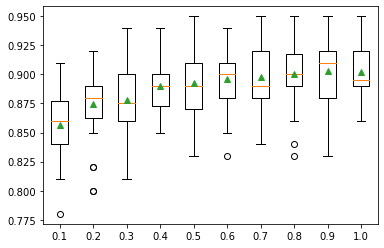

In [9]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        # set max_samples=None to use 100%
        if i == 1.0:
            i = None
        models[key] = RandomForestClassifier(max_samples=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En esta prueba para explorar cómo influencia la cantidad de muestras que existen para entrenar el modelo, se puede observar claramente que, a medida que se aumenta el porcentaje de cantidad de muestras utilizadas para entrenar cada uno de los modelos, aumenta al mismo tiempo su rendimiento. Cabe destacar que este rendimiento aumenta de una forma logarítmica, ya que la diferencia entre medias de los modelos iniciales es mucho mayort que a la de los últimos modelos.

#### Explore Number of Features

>1 0.888 (0.026)
>2 0.901 (0.024)
>3 0.904 (0.026)
>4 0.903 (0.022)
>5 0.903 (0.023)
>6 0.897 (0.023)
>7 0.899 (0.024)


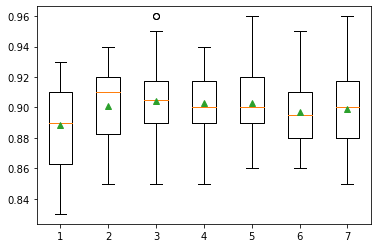

In [11]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # explore number of features from 1 to 7
    for i in range(1,8):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En esta prueba, podemos observar cómo incide la cantidad de *features* en el rendimiento del modelo en sí. Como hemos visto en las secciones previas de EDA, pueden haber *features* que, en lugar de ayudar a predecir el comportamiento del modelo, lo empeoran. Esto puede ser fácilmente observado en el modelo que utilizó únicamente 3 *features*, donde es el modelo que tiene mayor media de rendimiento. Podemos también observar que los modelos con una gran cantidad de *features* (6 y 7, específicamente), al igual que los modelos con insuficiente cantidad de *features* (1, específicamente), terminan dando resultados notablemente peores que con una cantidad modesta de *features*, ya que la complejidad del modelo no necesariamente garantiza que ser desempeñará mejor.

#### Explore Number of Trees

>10 0.871 (0.030)
>50 0.898 (0.026)
>100 0.903 (0.025)
>500 0.907 (0.022)
>1000 0.908 (0.025)


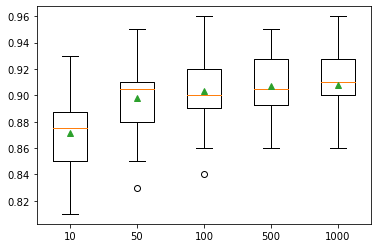

In [12]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En esta prueba, podemos observar el cambio que se evidencia con ir cambiando la cantidad de árboles dentro del *forest*. Este hiperparámetro se comporta muy similarmente a la cantidad de muestras, ya que existe cierto incremento logarítmico. Podemos observar cómo el aumento del rendimiento entre el primer modelo (10) y el segundo (50) aumenta de una manera mucho más significativa que entre el cuarto modelo (500) y el último (1000).

#### Explore Tree Depth

>1 0.767 (0.043)
>2 0.811 (0.032)
>3 0.837 (0.032)
>4 0.858 (0.027)
>5 0.869 (0.029)
>6 0.882 (0.028)
>7 0.888 (0.026)
>None 0.908 (0.023)


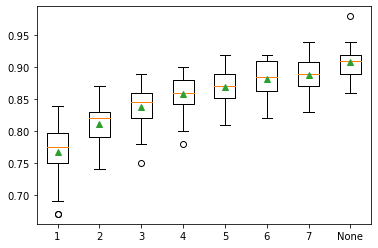

In [14]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    # consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En esta prueba, podemos observar cómo la profundidad de cada uno de los árboles afecta al rendimiento del modelo en sí. Podemos ver que se comporta similar a los hiperparámetros de cantidad de árboles y cantidad de muestras en respecto a su crecimiento logarítmico de crecimiento, que se hace notable al comparar el incremento entre los dos primeros modelos y los últimos dos. 

### Aspectos a profundizar

Uno de los aspectos que más me llama la atención es ver cómo uno identifica los hiperparámetros que más le sirven a uno; si es a punto de ir probando manualmente o si existe alguna forma de sistematizarlo más elegantemente y que pueda ser aplicado para cualquier hiperparámetro. Aparte de esa curiosidad, todo queda bastante claro y bien explicado.